# Edibility of Mushrooms

# Introduction:
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal

Mushrooms can be made for delicious dishes, but some of them are poisonous! Identifying the eligibility from the appearance of mushrooms would be essential especially when we encounter a new species of mushroom.

- Clearly state the question you will try to answer with your project


In our project, we aim to train a model which uses classification method to predict whether an unknown mushroom is edible or poisonous given various dimensions in its appearance.

- Identify and describe the dataset that will be used to answer the question

The dataset to train our model is called "Secondary mushroom data" from UCI Machine Learning Repository (https://mushroom.mathematik.uni-marburg.de/files/). This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as edible, poisonous, or of unknown edibility. Of the 20 variables, 3 are continuous, and 17 are nominal (3 are binary, and 14 are categorical).

# Preliminary exploratory data analysis:
- Demonstrate that the dataset can be read from the web into R 

In [21]:
library(tidyverse)
library(tidymodels)
library(cowplot)
mushrooms <- read_delim("data\ folder/secondary_data.csv", delim=";")
head(mushrooms)

Rows: 61069 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (16): class, cap-shape, cap-surface, cap-color, gill-attachment, gill-sp...
dbl  (3): cap-diameter, stem-height, stem-width
lgl  (2): does-bruise-or-bleed, has-ring

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,⋯,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>
p,15.26,x,g,o,FALSE,e,NA,w,16.95,⋯,s,y,w,u,w,TRUE,g,NA,d,w
p,16.60,x,g,o,FALSE,e,NA,w,17.99,⋯,s,y,w,u,w,TRUE,g,NA,d,u
p,14.07,x,g,o,FALSE,e,NA,w,17.80,⋯,s,y,w,u,w,TRUE,g,NA,d,w
p,14.17,f,h,e,FALSE,e,NA,w,15.77,⋯,s,y,w,u,w,TRUE,p,NA,d,w
p,14.64,x,h,o,FALSE,e,NA,w,16.53,⋯,s,y,w,u,w,TRUE,p,NA,d,w
p,15.34,x,g,o,FALSE,e,NA,w,17.84,⋯,s,y,w,u,w,TRUE,p,NA,d,u


- Clean and wrangle your data into a tidy format

In [ ]:
mushroom_wrangle <- mushrooms |>
    select(class, "cap-diameter", "stem-height", "stem-width") |>
    mutate(class = as_factor(class)) 
colnames(mushroom_wrangle) <- c("class", "diameter", "height", "width")

mushroom_split <- mushroom_wrangle |>
    initial_split(prop=0.75, strata=class)

mushroom_training <- training(mushroom_split)
head(mushroom_training)

class,diameter,height,width
<fct>,<dbl>,<dbl>,<dbl>
e,10.42,11.50,17.75
e,9.59,9.87,14.71
e,8.86,11.25,14.37
e,9.59,7.82,15.06
e,8.40,8.66,13.02
e,10.50,13.35,20.89


- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

In [ ]:
summarize_mushroom <- mushroom_training |>
    group_by(class) |>
    summarize(n = n())
summarize_mushroom

means_mushroom <- mushroom_training |>
    select(-class) |>
    map_df(mean)
    means_mushroom

missing_data <- mushroom_training |>
    filter(is.na(class) || is.na(diameter) || is.na(height) || is.na(width)) |>
    nrow()
missing_data

# sum(apply(mushroom_training, 1, function(x) any(is.na(x))) == TRUE) # count rows with na, same as above

class,n
<fct>,<int>
p,25416
e,20385


diameter,height,width
<dbl>,<dbl>,<dbl>
6.74131,6.57432,12.1469


[1] 0

- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

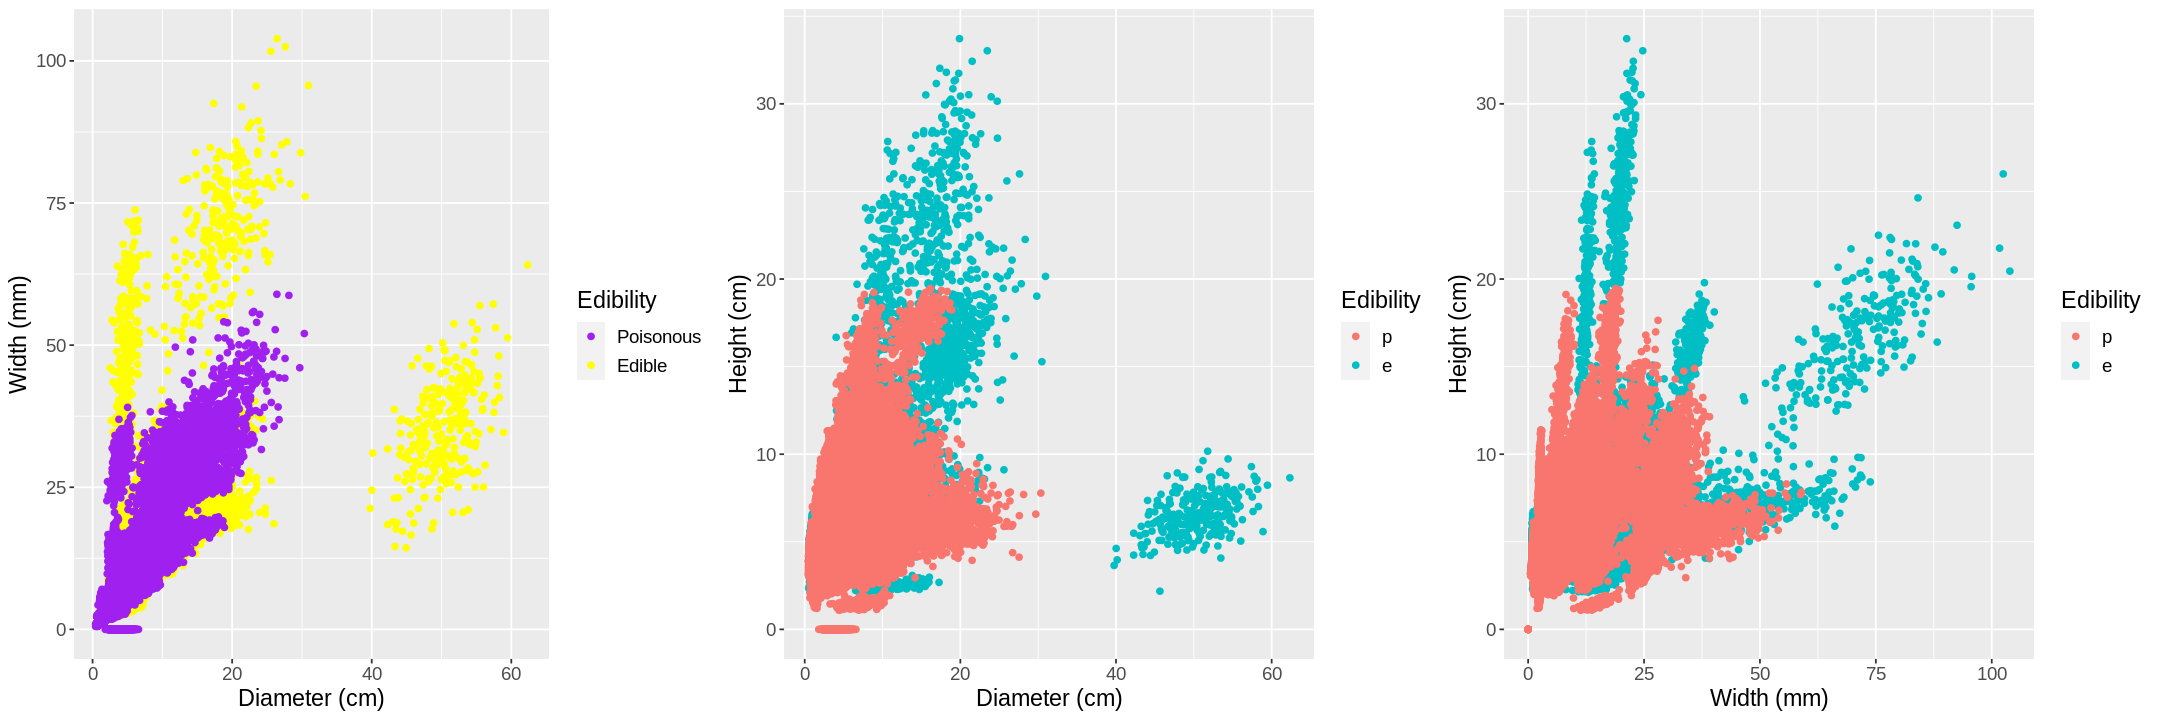

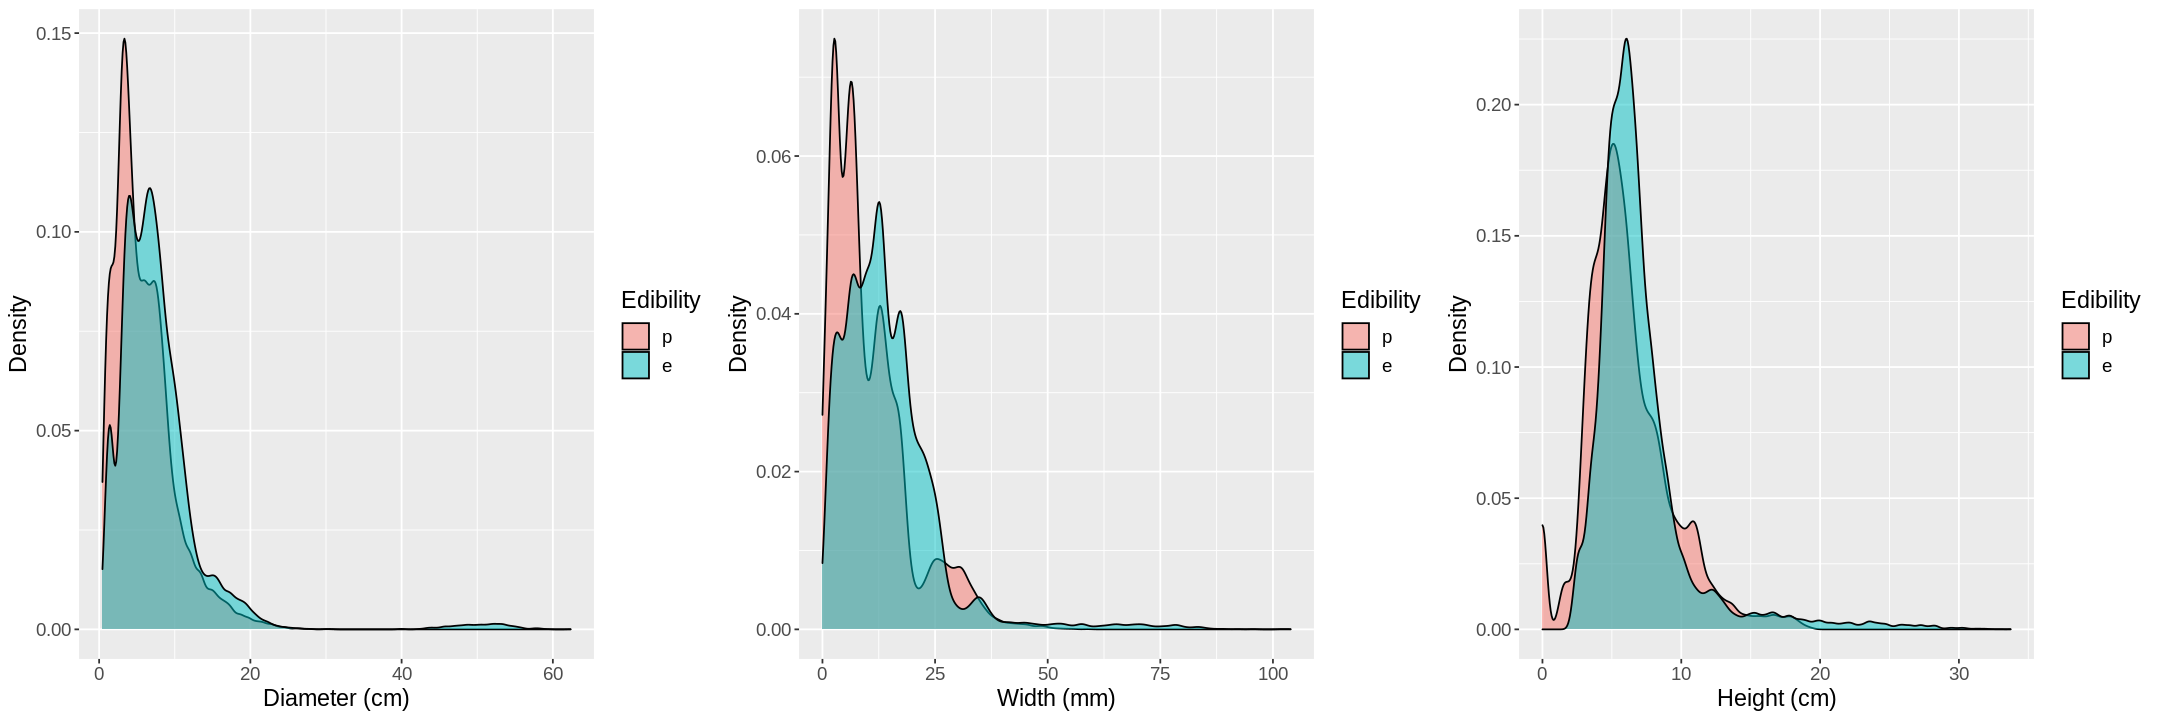

In [30]:

mushroom_plot1 <- mushroom_training |>
    ggplot(aes(x=diameter, y=width, color=class)) +
    geom_point() +
    labs(x="Diameter (cm)", y="Width (mm)", color="Edibility") +
    theme(text=element_text(size=14)) +
    scale_color_manual(labels = c("Poisonous", "Edible"), values = c("purple", "yellow"))
mushroom_plot2 <- mushroom_training |>
    ggplot(aes(x=diameter, y=height, color=class)) +
    geom_point() +
    labs(x="Diameter (cm)", y="Height (cm)", color="Edibility") +
    theme(text=element_text(size=14))
mushroom_plot3 <- mushroom_training |>
    ggplot(aes(x=width, y=height, color=class)) +
    geom_point() +
    labs(x="Width (mm)", y="Height (cm)", color="Edibility") +
    theme(text=element_text(size=14))
#mushroom_plot1
#mushroom_plot2
#mushroom_plot3


# Marginal density plot of diamter (top panel)
diameterDensity <- ggplot(mushroom_training, aes(diameter, fill=class)) + 
    geom_density(alpha=.5) + 
    labs(x = "Diameter (cm)", y = "Density", fill="Edibility") +
    #theme(legend.position = "none") +
    theme(text=element_text(size=14))
#diameterDensity

# Marginal density plot of width (right panel)
widthDensity <- ggplot(mushroom_training, aes(width, fill=class)) + 
    geom_density(alpha=.5) + 
    labs(x = "Width (mm)", y = "Density", fill="Edibility") +
    #theme(legend.position = "none") +
    theme(text=element_text(size=14))
#widthDensity

# Marginal density plot of height
heightDensity <- ggplot(mushroom_training, aes(height, fill=class)) + 
    geom_density(alpha=.5) + 
    labs(x = "Height (cm)", y = "Density", fill="Edibility") +
    #theme(legend.position = "none") +
    theme(text=element_text(size=14))
#heightDensity

options(repr.plot.width = 18, repr.plot.height = 6)
plot_grid(mushroom_plot1, mushroom_plot2, mushroom_plot3, ncol = 3)
plot_grid(diameterDensity, widthDensity, heightDensity, ncol = 3)

# Methods:
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

The available vairables are 3 continuous and 3 binary, of which we can modify the values into 0 and 1.
1) Continuous: width, height, diameter
2) Binary: does-bruise-bleed, veil-type, has-ring

We will conduct our data analysis by starting with the 3 continuous variables: width, height, and diameter to determine a mushroom's edibility. From that we could identify the accuracy of the model that uses only physical attributions of a mushroom and determine whether it can provide insight regarding edibility. Later we would add binary variables to the current model and see if the accuracy will be enhanced.
- Describe at least one way that you will visualize the results

We will start off from plotting scatterplots by using continuous variablespairing each two continous variables on the axes, which would create three parallel plots. We will color the dots according to the predictive results - true poisonous, true edible, false poisonous, and false poisonous.
We will also plot a bar graph to compare the percentage of the four categories above- true poisonous, true edible, false poisonous, and false poisonous.

# Expected outcomes and significance:
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?